In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
X = pd.read_csv('Training_Dataset.csv')

In [167]:
y = pd.read_csv('Labels.csv')

In [168]:
# Delete useless features told by Shirish
X.drop(['Package_Name', 'SHA256', 'ThumbPrint', 'Application_Category', 
        'Family_Name', 'Malware_Category', 'Malware/Benign', 'label'], axis = 1, inplace = True)

## Feature Exploration

#### Find the one-hot features having missing values

In [169]:
X.describe().loc['count'][X.describe().loc['count'] < 10954]

sdkVersion          0.0
targetSdkVersion    0.0
Name: count, dtype: float64

In [170]:
# Delete these useless features (100% missing values)
X = X.drop(['sdkVersion', 'targetSdkVersion'], axis = 1)

In [171]:
# Check if there's no onehot feature has missing values
X.describe().loc['count'][X.describe().loc['count'] < 10954]

Series([], Name: count, dtype: float64)

#### Remove features with 0 variance

In [172]:
X.max()[X.max() == 0].index.to_list()

['Permission: REQUEST_DELETE_PACKAGES',
 'Permission: BIND_MIDI_DEVICE_SERVICE',
 'Permission: BIND_TV_INPUT',
 'Permission: com.android.voicemail.permission.ADD_VOICEMAIL',
 'Permission: com.android.launcher.permission.UNINSTALL_SHORTCUT',
 'Permission: READ_PHONE_NUMBERS',
 'Permission: GET_ACCOUNTS_PRIVILEGED',
 'Permission: REQUEST_COMPANION_RUN_IN_BACKGROUND',
 'Permission: ANSWER_PHONE_CALLS',
 'Permission: BIND_CARRIER_SERVICES',
 'Permission: REQUEST_IGNORE_BATTERY_OPTIMIZATIONS',
 'Permission: ACCESS_NOTIFICATION_POLICY',
 'Permission: com.android.voicemail.permission.READ_VOICEMAIL',
 'Permission: BODY_SENSORS',
 'Permission: BIND_SCREENING_SERVICE',
 'Permission: REQUEST_COMPANION_USE_DATA_IN_BACKGROUND',
 'Permission: BIND_TELECOM_CONNECTION_SERVICE',
 'Permission: BIND_VOICE_INTERACTION',
 'Permission: BIND_CHOOSER_TARGET_SERVICE',
 'Permission: com.android.launcher.permission.INSTALL_SHORTCUT',
 'Permission: BIND_AUTOFILL_SERVICE',
 'Permission: USE_FINGERPRINT',
 'Permis

In [173]:
X.drop(X.max()[X.max() == 0].index.to_list(), axis = 1, inplace = True)

## Feature Summary:


### Original Dataset:

#### (1) Missing Values:
   + Features with 100% missing values: 'sdkVersion', 'targetSdkVersion' (deleted)


#### (2) Features with 0 Variance:
  + Number of Features with 0 Variance: 511 (deleted)


### Preprocessed Dataset:

#### (1) Categories of Features:
  + Number of one-hot features: 352
 
 
#### (2) Features Extracted by Us
  + Number of featuers extracted by us (sensors): 29

In [178]:
chi2, p = chi2(X, y)

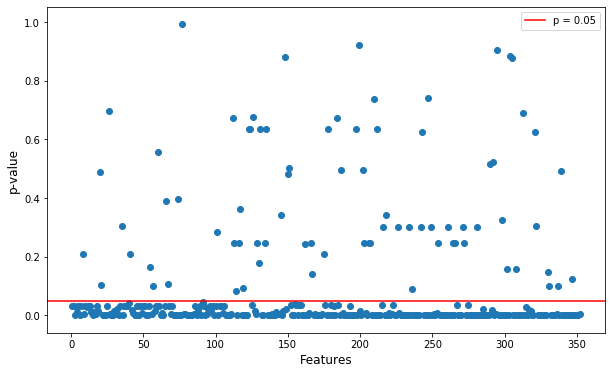

In [180]:
plt.figure(figsize = (10, 6))
plt.scatter(np.arange(1, 353), p)
plt.axhline(y=0.05, color='r', linestyle='-', label = 'p = 0.05')
plt.xlabel('Features', fontsize = 12)
plt.ylabel('p-value', fontsize = 12)
plt.legend()

In [144]:
select = SelectKBest(k=353, score_func=chi2)
select.fit(X, y)

SelectKBest(k=353, score_func=<function chi2 at 0x7f9d515a6320>)

In [145]:
select.transform(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Building Pipelines

In [181]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, chi2
from category_encoders.target_encoder import TargetEncoder, OrdinalEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify = y)

In [188]:
continuous = make_column_selector(dtype_exclude = 'object')

pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())

In [189]:
avg_val_score = np.mean(cross_val_score(pipe, X_train, np.squeeze(y_train.to_numpy().reshape(1, -1)), cv = 5))
print('The mean test score of Logistic Regression model is:', avg_val_score)

/Users/liuboyu/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/liuboyu/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

The mean test score of Logistic Regression model is: 0.885882192822741


/Users/liuboyu/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [190]:
pipe.fit(X_train, np.squeeze(y_train.to_numpy().reshape(1, -1)))

/Users/liuboyu/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [191]:
y_pred = pipe.predict(X_test)

In [192]:
confusion_matrix(np.squeeze(y_test.to_numpy().reshape(1, -1)), y_pred)

array([[ 215,  186],
       [  70, 1720]])